In [26]:
import pandas as pd 
import matplotlib.pyplot as plt
import MetaTrader5 as mt5
ativo = 'WDO$N'
mt5.initialize()
data = pd.DataFrame(mt5.copy_rates_from_pos(ativo, mt5.TIMEFRAME_D1, 0, 252))
data['data'] = pd.to_datetime(data['time'],unit='s')
del data['time']
data['data'] = data['data'].dt.strftime('%d/%m/%Y')
contratos = pd.read_csv('Contratos em aberto b3 - DOLFUT.csv',sep=';')
contratos['saldo_gringos'] = contratos['gringos_comprados'] - contratos['gringos_vendidos']
contratos['saldo_institucionais'] = contratos['institucionais_comprados'] - contratos['institucionais_vendidos']
contratos['saldo_bancos'] = contratos['bancos_comprados'] - contratos['bancos_vendidos']
contratos['delta_compra'] = contratos['gringos_comprados'] - contratos['gringos_comprados'].shift(1)
data['distorcido'] = (data['close']-data['open'])*100/data['open']
contratos['porcentagem'] = (contratos['saldo_gringos']-contratos['saldo_gringos'].shift(1))*100/contratos['saldo_gringos'].shift(1)

In [30]:
mesclagem = data.merge(contratos,on='data',how='inner')
mesclagem[-22:]

,open,high,low,close,tick_volume,spread,real_volume,data,distorcido,gringos_comprados,gringos_vendidos,institucionais_comprados,institucionais_vendidos,bancos_comprados,bancos_vendidos,saldo_gringos,saldo_institucionais,saldo_bancos,delta_compra,porcentagem
225,4949.0,4978.0,4940.5,4972.0,586090,500,2348614,25/09/2023,0.464740,294340,183804,142913,313709,247720,160310,110536,-170796,87410,26128.0,-10.657043
226,4977.0,4996.0,4954.0,4989.5,770297,500,3233990,26/09/2023,0.251155,328475,236734,146596,299772,268655,178025,91741,-153176,90630,34135.0,-17.003510
227,4987.0,5079.5,4987.0,5044.0,945803,500,4305063,27/09/2023,1.142972,381890,260994,164206,308777,240285,184200,120896,-144571,56085,53415.0,31.779684
228,5040.0,5070.5,5015.5,5034.5,921743,500,3806231,28/09/2023,-0.109127,414703,313184,374983,530417,275605,195065,101519,-155434,80540,32813.0,-16.027826
229,5038.5,5057.0,5009.5,5057.0,817863,500,3506045,29/09/2023,0.367173,419503,325394,377237,539796,316685,222945,94109,-162559,93740,4800.0,-7.299126
230,5088.0,5100.0,5057.5,5083.0,762985,500,3177140,02/10/2023,-0.098270,212400,130536,259010,340399,130485,103605,81864,-81389,26880,-207103.0,-13.011508
231,5099.0,5192.5,5090.0,5187.5,1072321,500,4537192,03/10/2023,1.735634,239750,143951,278675,345249,125145,127325,95799,-66574,-2180,27350.0,17.022134
232,5162.0,5197.0,5142.5,5173.0,1002944,500,4033802,04/10/2023,0.213096,277305,146096,273094,337413,99525,137835,131209,-64319,-38310,37555.0,36.962808
233,5185.0,5206.0,5167.5,5185.0,881824,500,3318372,05/10/2023,0.000000,287170,160676,272519,334278,94050,129405,126494,-61759,-35355,9865.0,-3.593503
234,5181.5,5237.0,5160.5,5163.0,1079881,500,4034020,06/10/2023,-0.357039,295855,186606,275745,337909,110105,130160,109249,-62164,-20055,8685.0,-13.633058


<Figure size 3000x900 with 0 Axes>

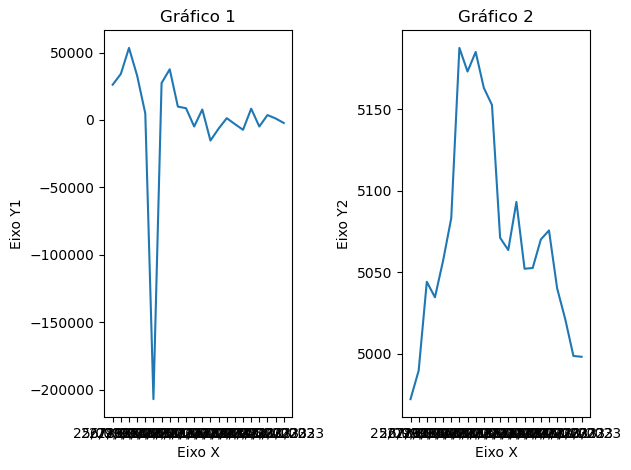

In [29]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Crie os dados para os gráficos
x = mesclagem['data'][-22:]
y1 = mesclagem['delta_compra'][-22:]
y2 = mesclagem['close'][-22:]
plt.figure(figsize=(30,9))
# Crie a estrutura da grade
fig = plt.figure()
gs = GridSpec(1, 2, width_ratios=[1, 1])

# Adicione o primeiro gráfico
ax1 = fig.add_subplot(gs[0])
ax1.plot(x, y1)
ax1.set_title('Gráfico 1')
ax1.set_xlabel('Eixo X')
ax1.set_ylabel('Eixo Y1')

# Adicione o segundo gráfico
ax2 = fig.add_subplot(gs[1])
ax2.plot(x, y2)
ax2.set_title('Gráfico 2')
ax2.set_xlabel('Eixo X')
ax2.set_ylabel('Eixo Y2')

# Ajuste o layout para evitar sobreposição
plt.tight_layout()

# Mostrar os gráficos
plt.show()

# plt.plot(mesclagem['data'][-22:],mesclagem['distorcido'][-22:])
# plt.plot(mesclagem['data'][-22:],mesclagem['porcentagem'][-22:])
# plt.show()

In [13]:
contratos

,data,gringos_comprados,gringos_vendidos,institucionais_comprados,institucionais_vendidos,bancos_comprados,bancos_vendidos,saldo_gringos,saldo_institucionais,saldo_bancos
0,07/05/2018,216607,48718,174098,291008,83123,134413,167889,-116910,-51290
1,08/05/2018,217585,51977,186969,292963,83248,144343,165608,-105994,-61095
2,09/05/2018,231600,44029,180988,297645,89108,161783,187571,-116657,-72675
3,10/05/2018,219275,54534,197022,304914,96848,158098,164741,-107892,-61250
4,11/05/2018,223987,51787,196991,301741,93688,167058,172200,-104750,-73370
...,...,...,...,...,...,...,...,...,...,...
1355,19/10/2023,276120,232524,279496,344582,173735,153060,43596,-65086,20675
1356,20/10/2023,271217,232749,282346,346749,183410,159145,38468,-64403,24265
1357,23/10/2023,274797,243819,282265,348448,198245,168800,30978,-66183,29445
1358,24/10/2023,275889,248639,281329,348534,211950,177300,27250,-67205,34650
